In [3]:
from datasets import load_from_disk, load_dataset, Dataset, DatasetDict
from src.modules import *

# Load the combined dataset from disk
train_dataset_tico_scipar = load_from_disk('data/mixed_dataset_tico_scipar')
train_dataset_wikimedia_scipar = load_from_disk('data/mixed_dataset')
dev_dataset_tico = load_dataset('sethjsa/tico_en_ru')
dev_dataset_medline= load_dataset('sethjsa/medline_ru_parallel')
dev_dataset_tico_split = 'dev'
dev_dataset_medline_split = 'train'
train_dataset_tico_scipar_split = 'train'
train_dataset_wikimedia_scipar_split = 'train'

model, tokenized_dev_dataset, tokenizer, training_args = 1, 1, 1, 1
dev_sample_percentage = 0.05
save_percentage = 0.05

In [10]:
def test_selection_range(model, train_dataset, dev_dataset, tokenized_dev_dataset, train_split, dev_split, dev_sample_percentage, save_percentage, tokenizer, training_args, input_set):
    if input_set == "tico_scipar":
        selected_data, indices = select_data_subset(model, train_dataset, dev_dataset, tokenized_dev_dataset, dev_sample_percentage, save_percentage, tokenizer, training_args, train_split=train_split, dev_split=dev_split, selection_method="bm25", src_lang="en", output_lang="ru", return_indices=True)
        print(f"testing bm25")
        percentage_bm25 = sum([1 for i in indices if i <2100]) / len(indices) * 100
        print(f"Percentage of indices in selection threshold: {percentage_bm25:.2f}%")
        selected_data, indices = select_data_subset(model, train_dataset, dev_dataset, tokenized_dev_dataset, dev_sample_percentage, save_percentage, tokenizer, training_args, train_split=train_split, dev_split=dev_split, selection_method="5gram", src_lang="en", output_lang="ru", return_indices=True)
        print(f"testing 5gram")
        percentage_5gram = sum([1 for i in indices if i <2100]) / len(indices) * 100
        print(f"Percentage of indices in selection threshold: {percentage_5gram:.2f}%")
        selected_data, indices = select_data_subset(model, train_dataset, dev_dataset, tokenized_dev_dataset, dev_sample_percentage, save_percentage, tokenizer, training_args, train_split=train_split, dev_split=dev_split, selection_method="random", src_lang="en", output_lang="ru", return_indices=True)
        print(f"testing random")
        percentage_random = sum([1 for i in indices if i <2100]) / len(indices) * 100
        print(f"Percentage of indices in selection threshold: {percentage_random:.2f}%")
    elif input_set == "wikimedia_scipar":
        selected_data, indices = select_data_subset(model, train_dataset, dev_dataset, tokenized_dev_dataset, dev_sample_percentage, save_percentage, tokenizer, training_args, train_split=train_split, dev_split=dev_split, selection_method="bm25", src_lang="en", output_lang="ru", return_indices=True)
        print(f"testing bm25")
        percentage_bm25 = sum([1 for i in indices if i > 90000]) / len(indices) * 100
        print(f"Percentage of indices in selection threshold: {percentage_bm25:.2f}%")
        selected_data, indices = select_data_subset(model, train_dataset, dev_dataset, tokenized_dev_dataset, dev_sample_percentage, save_percentage, tokenizer, training_args, train_split=train_split, dev_split=dev_split, selection_method="5gram", src_lang="en", output_lang="ru", return_indices=True)
        print(f"testing 5gram")
        percentage_5gram = sum([1 for i in indices if i > 90000]) / len(indices) * 100
        print(f"Percentage of indices in selection threshold: {percentage_5gram:.2f}%")
        selected_data, indices = select_data_subset(model, train_dataset, dev_dataset, tokenized_dev_dataset, dev_sample_percentage, save_percentage, tokenizer, training_args, train_split=train_split, dev_split=dev_split, selection_method="random", src_lang="en", output_lang="ru", return_indices=True)
        print(f"testing random")
        percentage_random = sum([1 for i in indices if i > 90000]) / len(indices) * 100
        print(f"Percentage of indices in selection threshold: {percentage_random:.2f}%")
    return percentage_bm25, percentage_5gram, percentage_random

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# create a plot for varying the dev_sample_percentage threshold
list_bm25 = []
list_5gram = []
list_random = []


for i in np.arange(0.01, 1, 0.20):
    print(f"Testing with dev_sample_percentage: {i}")
    percentage_bm25, percentage_5gram, percentage_random = test_selection_range(model, train_dataset_tico_scipar, dev_dataset_tico, tokenized_dev_dataset, train_dataset_tico_scipar_split, dev_dataset_tico_split, i, save_percentage, tokenizer, training_args, input_set="tico_scipar")

    list_bm25.append(percentage_bm25)
    list_5gram.append(percentage_5gram)
    list_random.append(percentage_random)


data = {
    'dev_sample_percentage': np.arange(0.01, 1, 0.20),
    'bm25': list_bm25,
    '5gram': list_5gram,
    'random': list_random
}
df = pd.DataFrame(data)

# Set the figure size
plt.figure(figsize=(10, 6))
# Plot the data
plt.plot(df['dev_sample_percentage'], df['bm25'], marker='o', label='BM25')
plt.plot(df['dev_sample_percentage'], df['5gram'], marker='o', label='5-gram')
plt.plot(df['dev_sample_percentage'], df['random'], marker='o', label='Random')

# Set the title and labels
plt.title('Percentage of Indices in Selection Threshold vs. dev_sample_percentage')
plt.xlabel('dev_sample_percentage')
plt.ylabel('Percentage of Indices in Selection Threshold')
plt.xticks(np.arange(0.01, 1, 0.20))
plt.yticks(np.arange(0, 110, 10))
plt.grid()
plt.legend()


Testing with dev_sample_percentage: 0.01
testing bm25
Percentage of indices in selection threshold: 14.71%
testing 5gram
Percentage of indices in selection threshold: 14.38%
testing random
Percentage of indices in selection threshold: 17.02%
Testing with dev_sample_percentage: 0.21000000000000002
testing bm25
Percentage of indices in selection threshold: 20.17%
testing 5gram
Percentage of indices in selection threshold: 14.38%
testing random
Percentage of indices in selection threshold: 15.87%
Testing with dev_sample_percentage: 0.41000000000000003
testing bm25
Percentage of indices in selection threshold: 23.80%
testing 5gram
Percentage of indices in selection threshold: 14.38%
testing random
Percentage of indices in selection threshold: 15.37%
Testing with dev_sample_percentage: 0.6100000000000001
testing bm25
Percentage of indices in selection threshold: 25.12%
testing 5gram
Percentage of indices in selection threshold: 14.38%
testing random
Percentage of indices in selection thresh

ValueError: All arrays must be of the same length

In [ ]:
# create a plot for varying the dev_sample_percentage threshold
list_bm25 = []
list_5gram = []
list_random = []


for i in np.arange(0.01, 1, 0.20):
    print(f"Testing with dev_sample_percentage: {i}")
    percentage_bm25, percentage_5gram, percentage_random = test_selection_range(model, train_dataset_wikimedia_scipar, dev_dataset_medline, tokenized_dev_dataset, train_dataset_wikimedia_scipar_split, dev_dataset_medline_split, i, save_percentage, tokenizer, training_args, input_set="wikimedia_scipar")
    list_bm25.append(percentage_bm25)
    list_5gram.append(percentage_5gram)
    list_random.append(percentage_random)


data = {
    'dev_sample_percentage': np.arange(0.01, 1, 0.20),
    'bm25': list_bm25,
    '5gram': list_5gram,
    'random': list_random
}
df = pd.DataFrame(data)

# Set the figure size
plt.figure(figsize=(10, 6))
# Plot the data
plt.plot(df['dev_sample_percentage'], df['bm25'], marker='o', label='BM25')
plt.plot(df['dev_sample_percentage'], df['5gram'], marker='o', label='5-gram')
plt.plot(df['dev_sample_percentage'], df['random'], marker='o', label='Random')

# Set the title and labels
plt.title('Percentage of Indices in Selection Threshold vs. dev_sample_percentage')
plt.xlabel('dev_sample_percentage')
plt.ylabel('Percentage of Indices in Selection Threshold')
plt.xticks(np.arange(0.01, 1, 0.20))
plt.yticks(np.arange(0, 110, 10))
plt.grid()
plt.legend()

Testing with dev_sample_percentage: 0.01
testing bm25
Percentage of indices in selection threshold: 28.52%
testing 5gram
Percentage of indices in selection threshold: 23.52%
testing random
Percentage of indices in selection threshold: 9.92%
Testing with dev_sample_percentage: 0.21000000000000002
testing bm25
Percentage of indices in selection threshold: 27.08%
testing 5gram
Percentage of indices in selection threshold: 23.52%
testing random
Percentage of indices in selection threshold: 9.38%
Testing with dev_sample_percentage: 0.41000000000000003


KeyboardInterrupt: 

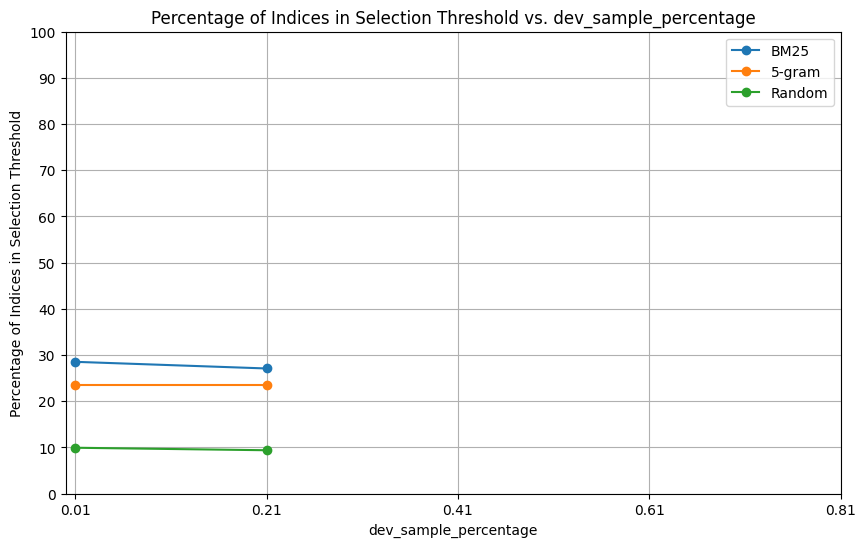

In [31]:
data = {
    'dev_sample_percentage': np.arange(0.01, 0.41, 0.20),
    'bm25': list_bm25,
    '5gram': list_5gram,
    'random': list_random
}
df = pd.DataFrame(data)

# Set the figure size
plt.figure(figsize=(10, 6))
# Plot the data
plt.plot(df['dev_sample_percentage'], df['bm25'], marker='o', label='BM25')
plt.plot(df['dev_sample_percentage'], df['5gram'], marker='o', label='5-gram')
plt.plot(df['dev_sample_percentage'], df['random'], marker='o', label='Random')

# Set the title and labels
plt.title('Percentage of Indices in Selection Threshold vs. dev_sample_percentage')
plt.xlabel('dev_sample_percentage')
plt.ylabel('Percentage of Indices in Selection Threshold')
plt.xticks(np.arange(0.01, 1, 0.20))
plt.yticks(np.arange(0, 110, 10))
plt.grid()
plt.legend()

Testing with save_percentage: 0.1
testing bm25
Percentage of indices in selection threshold: 23.97%
testing 5gram
Percentage of indices in selection threshold: 7.19%
testing random
Percentage of indices in selection threshold: 16.53%
Testing with save_percentage: 0.25
testing bm25
Percentage of indices in selection threshold: 17.75%
testing 5gram
Percentage of indices in selection threshold: 2.88%
testing random
Percentage of indices in selection threshold: 17.19%
Testing with save_percentage: 0.4
testing bm25
Percentage of indices in selection threshold: 13.55%
testing 5gram
Percentage of indices in selection threshold: 1.80%
testing random
Percentage of indices in selection threshold: 17.05%
Testing with save_percentage: 0.5499999999999999
testing bm25
Percentage of indices in selection threshold: 12.37%
testing 5gram
Percentage of indices in selection threshold: 6.10%
testing random
Percentage of indices in selection threshold: 16.83%
Testing with save_percentage: 0.7
testing bm25
P

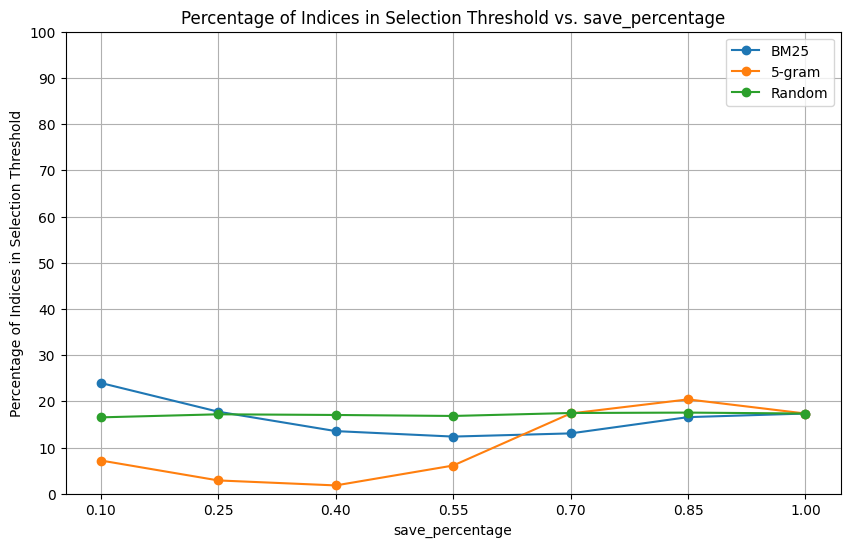

In [37]:
# evaluate different save_percentage thresholds
list_bm25 = []
list_5gram = []
list_random = []

for i in np.arange(0.10, 1.0001, 0.15):
    print(f"Testing with save_percentage: {i}")
    percentage_bm25, percentage_5gram, percentage_random = test_selection_range(model, train_dataset_tico_scipar, dev_dataset_tico, tokenized_dev_dataset, train_dataset_tico_scipar_split, dev_dataset_tico_split, dev_sample_percentage, i, tokenizer, training_args, input_set="tico_scipar")
    list_bm25.append(percentage_bm25)
    list_5gram.append(percentage_5gram)
    list_random.append(percentage_random)
data = {
    'save_percentage': np.arange(0.10, 1.0001, 0.15),
    'bm25': list_bm25,
    '5gram': list_5gram,
    'random': list_random
}
df = pd.DataFrame(data)
# Set the figure size
plt.figure(figsize=(10, 6))
# Plot the data
plt.plot(df['save_percentage'], df['bm25'], marker='o', label='BM25')
plt.plot(df['save_percentage'], df['5gram'], marker='o', label='5-gram')
plt.plot(df['save_percentage'], df['random'], marker='o', label='Random')
# Set the title and labels
plt.title('Percentage of Indices in Selection Threshold vs. save_percentage')
plt.xlabel('save_percentage')
plt.ylabel('Percentage of Indices in Selection Threshold')
plt.xticks(np.arange(0.10, 1.0001, 0.15))
plt.yticks(np.arange(0, 110, 10))
plt.grid()
plt.legend()

